In [1]:
import tensorflow as tf
import keras

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train=X_train/255
X_test =X_test/255

In [ ]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.4627451 , 0.09411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.18823529, 0.34509804, 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04705882, 0.39215686,
        0.83137255, 0.80392157, 0.7254902 , 0.70196078, 0.67843137,
        0.72941176, 0.75686275, 0.86666667, 0.55686275, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.29803922, 0.78039216, 0.88235294, 0.97254902, 1.        ,
        0.93333333, 0.8862

In [ ]:
y_train[2]

0

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
import matplotlib.pyplot as plt

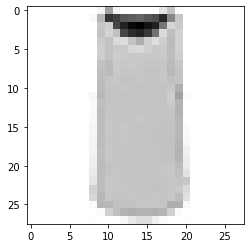

In [ ]:
plt.imshow(X_train[2],cmap='Greys')

In [ ]:
import numpy as np

TypeError: ignored

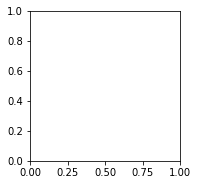

In [ ]:

plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=30,activation='softmax')




])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               692352    
                                                                 
 dense_10 (Dense)            (None, 30)                3870      
                                                                 
Total params: 696,542
Trainable params: 696,542
Non-trainable params: 0
________________________________________________

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=80,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/80
94/94 [==============================] - 15s 148ms/step - loss: 0.7123 - accuracy: 0.7713 - val_loss: 0.4445 - val_accuracy: 0.8503
Epoch 2/80
94/94 [==============================] - 15s 159ms/step - loss: 0.4043 - accuracy: 0.8591 - val_loss: 0.3910 - val_accuracy: 0.8622
Epoch 3/80
94/94 [==============================] - 16s 166ms/step - loss: 0.3543 - accuracy: 0.8774 - val_loss: 0.3516 - val_accuracy: 0.8793
Epoch 4/80
94/94 [==============================] - 15s 156ms/step - loss: 0.3240 - accuracy: 0.8864 - val_loss: 0.3330 - val_accuracy: 0.8838
Epoch 5/80
94/94 [==============================] - 14s 147ms/step - loss: 0.3069 - accuracy: 0.8917 - val_loss: 0.3285 - val_accuracy: 0.8855
Epoch 6/80
94/94 [==============================] - 14s 147ms/step - loss: 0.2832 - accuracy: 0.9001 - val_loss: 0.3099 - val_accuracy: 0.8922
Epoch 7/80
94/94 [==============================] - 14s 151ms/step - loss: 0.2693 - accuracy: 0.9046 - val_loss: 0.3175 - val_accuracy: 0.8884

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 5ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5260 - accuracy: 0.9104


[0.5259852409362793, 0.9103999733924866]

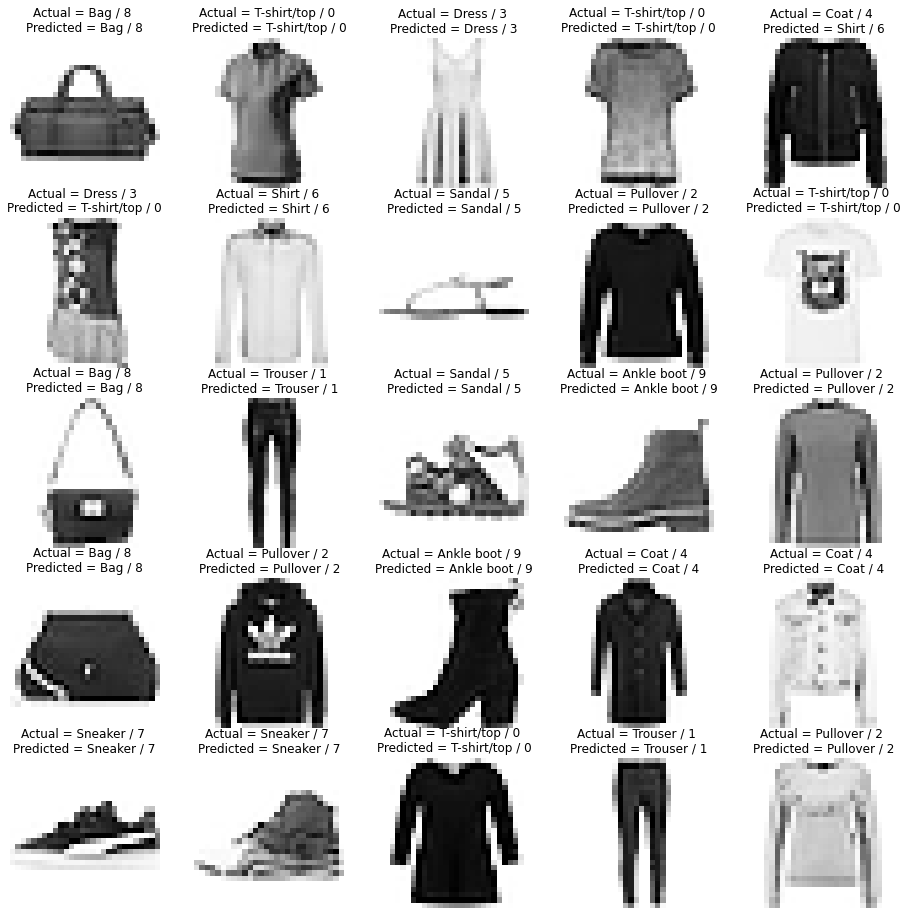

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

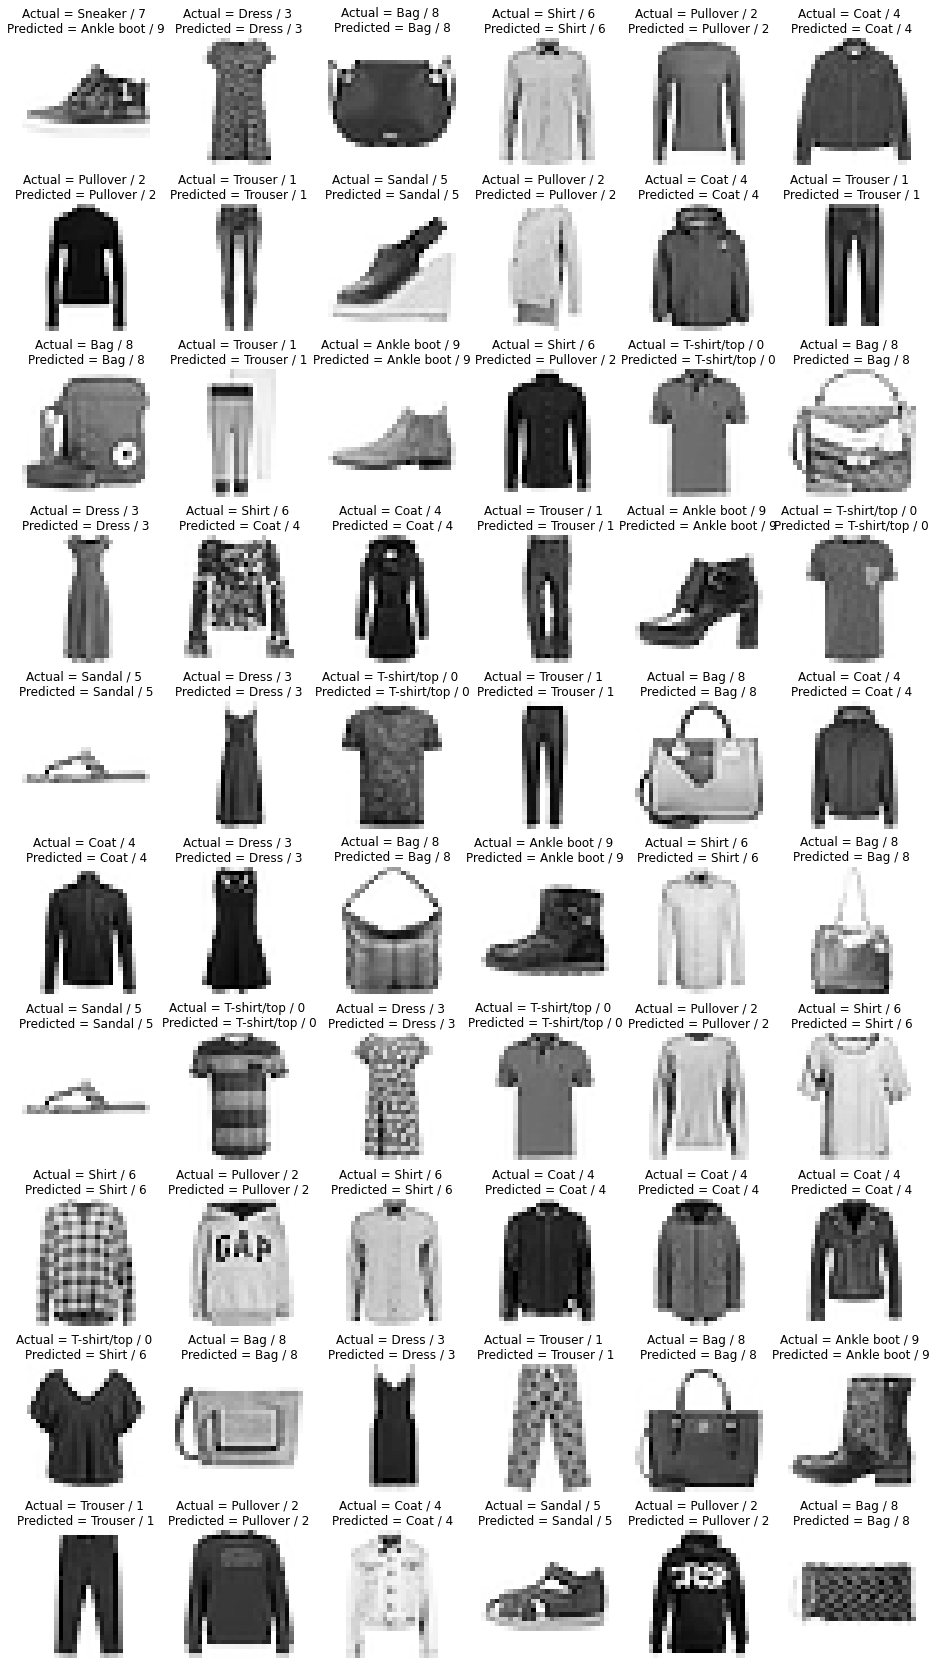

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

In [ ]:
import seaborn as sns

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.90      0.86      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.87      0.86      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.74      0.75      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



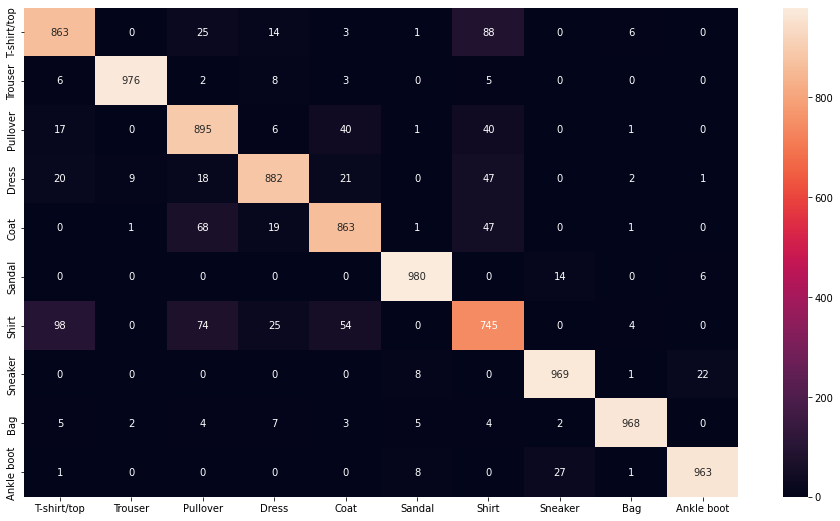

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

"""######## very complex model"""

#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model3.fit(X_train, y_train, epochs=90, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 19s 195ms/step - loss: 1.0204 - accuracy: 0.6215 - val_loss: 0.5753 - val_accuracy: 0.7772
Epoch 2/20
94/94 [==============================] - 18s 191ms/step - loss: 0.5510 - accuracy: 0.7918 - val_loss: 0.4614 - val_accuracy: 0.8272
Epoch 3/20
94/94 [==============================] - 18s 191ms/step - loss: 0.4569 - accuracy: 0.8306 - val_loss: 0.4132 - val_accuracy: 0.8486
Epoch 4/20
94/94 [==============================] - 17s 182ms/step - loss: 0.4070 - accuracy: 0.8502 - val_loss: 0.3874 - val_accuracy: 0.8541
Epoch 5/20
94/94 [==============================] - 17s 181ms/step - loss: 0.3679 - accuracy: 0.8666 - val_loss: 0.3406 - val_accuracy: 0.8712
Epoch 6/20
94/94 [==============================] - 17s 181ms/step - loss: 0.3445 - accuracy: 0.8747 - val_loss: 0.3351 - val_accuracy: 0.8731
Epoch 7/20
94/94 [==============================] - 17s 180ms/step - loss: 0.3234 - accuracy: 0.8827 - val_loss: 0.3120 - val_accuracy: 0.8845

[0.6877521276473999, 0.9042999744415283]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5260 - accuracy: 0.9104


[0.5259852409362793, 0.9103999733924866]